In [ ]:
from tensorflow import keras
import cv2
import sklearn
from sklearn.cluster import KMeans
import scipy.cluster.vq as vq
import numpy as np
import pandas as pd
import pickle
import numpy as np
import random
import scipy.io
import os
from PIL import Image

DSIFT_STEP_SIZE = 4


NUMBER_IMAGES_CLASS = 15      # the number of images per class
SIFT_type = 'dense'           # The type of SIFT feature  : dense or sparse
random.seed(777)
data_path = "/content/drive/MyDrive/Caltech_101/101_ObjectCategories"
dir_name = ['tick', 'trilobite', 'umbrella', 'watch', 'water_lilly', 'wheelchair', 'wild_cat', 'windsor_chair', 'wrench', 'yin_yang']

def load_data(path = data_path):
    train_data = []
    test_data = []
    train_label = []
    test_label = []

    for i in range(10):
        path = data_path + '/' + dir_name[i]
        files = os.listdir(path)
        img_files = [f for f in files if f.endswith(".jpg")]
        random.shuffle(img_files)
        selected_files = img_files[:30]
        for j in range(30):
            img = cv2.imread(path + '/' + selected_files[j], cv2.IMREAD_COLOR)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (256,256))    # image size : (256, 256, 3)
            if j < 15:
                train_data.append(img)
                train_label.append(i)
            else:
                test_data.append(img)
                test_label.append(i)
    train_data = np.array(train_data) / 255.0
    train_label = np.array(train_label)
    test_data = np.array(test_data) / 255.0
    test_label = np.array(test_label)

    return train_data, train_label, test_data, test_label

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

train_data, train_label, test_data, test_label = load_data(data_path)
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

train_data2, val_data, train_label2, val_label = train_test_split(train_data, train_label, test_size = 0.2, random_state = 42)
print(train_data2.shape)
print(val_data.shape)
print(train_label2.shape)
print(val_label.shape)

(150, 256, 256)
(150,)
(150, 256, 256)
(150,)
(120, 256, 256)
(30, 256, 256)
(120,)
(30,)


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 256, 256, 32)      416       
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 128, 128, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 128, 128, 64)      8256      
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 64, 64, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 262144)            0         
                                                                 
 dense_26 (Dense)            (None, 128)             

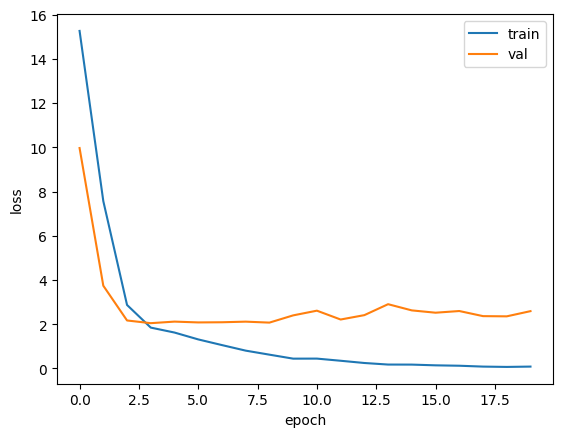

5/5 [==============================] - 0s 66ms/step - loss: 2.0364 - accuracy: 0.6067


[2.0363821983337402, 0.6066666841506958]

In [ ]:
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=2,activation='relu',padding='same', input_shape=(256,256,3)))
model.add(keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64,kernel_size=2,activation='relu',padding='same'))
model.add(keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(128, kernel_size=2,activation='relu',padding='same'))
model.add(keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(256, kernel_size=2,activation='relu',padding='same'))
model.add(keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.BatchNormalization(momentum=0.9, epsilon=1e-5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
#################################
# Using black and white version #
#################################
from tensorflow import keras
import cv2
import sklearn
from sklearn.cluster import KMeans
import scipy.cluster.vq as vq
import numpy as np
import pandas as pd
import pickle
import numpy as np
import random
import scipy.io
import os
from PIL import Image

DSIFT_STEP_SIZE = 4


NUMBER_IMAGES_CLASS = 15      # the number of images per class
SIFT_type = 'dense'           # The type of SIFT feature  : dense or sparse
random.seed(777)
data_path = "/content/drive/MyDrive/Caltech_101/101_ObjectCategories"
dir_name = ['tick', 'trilobite', 'umbrella', 'watch', 'water_lilly', 'wheelchair', 'wild_cat', 'windsor_chair', 'wrench', 'yin_yang']

def load_data(path = data_path):
    train_data = []
    test_data = []
    train_label = []
    test_label = []

    for i in range(10):
        path = data_path + '/' + dir_name[i]
        files = os.listdir(path)
        img_files = [f for f in files if f.endswith(".jpg")]
        random.shuffle(img_files)
        selected_files = img_files[:30]
        for j in range(30):
            img = cv2.imread(path + '/' + selected_files[j], cv2.IMREAD_COLOR)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (256,256))    # image size : (256, 256, 1)
            if j < 15:
                train_data.append(img)
                train_label.append(i)
            else:
                test_data.append(img)
                test_label.append(i)
    train_data = np.array(train_data).reshape(-1,256,256,1) / 255.0
    train_label = np.array(train_label)
    test_data = np.array(test_data).reshape(-1,256,256,1) / 255.0
    test_label = np.array(test_label)

    return train_data, train_label, test_data, test_label

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

train_data, train_label, test_data, test_label = load_data(data_path)
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

train_data2, val_data, train_label2, val_label = train_test_split(train_data, train_label, test_size = 0.2, random_state = 42)
print(train_data2.shape)
print(val_data.shape)
print(train_label2.shape)
print(val_label.shape)


(150, 256, 256, 1)
(150,)
(150, 256, 256, 1)
(150,)
(120, 256, 256, 1)
(30, 256, 256, 1)
(120,)
(30,)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 256, 256, 32)      160       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 128, 128, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      8256      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 262144)            0         
                                                                 
 dense_2 (Dense)             (None, 128)              

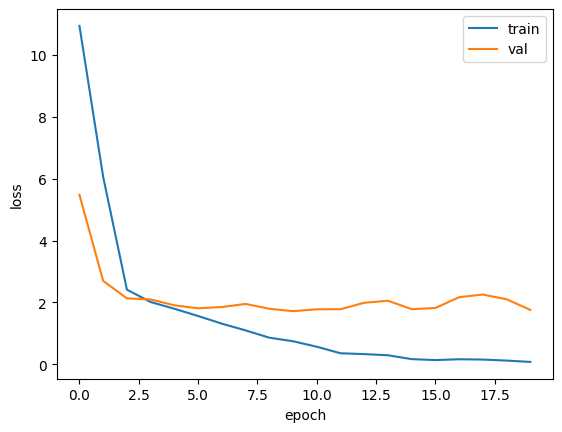

5/5 [==============================] - 0s 39ms/step - loss: 1.6145 - accuracy: 0.5800


[1.6145037412643433, 0.5799999833106995]

In [ ]:
### best model #################
model=keras.Sequential()

model.add(keras.layers.Conv2D(32,kernel_size=2,activation='relu',padding='same', input_shape=(256,256,1)))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Conv2D(64,kernel_size=2,activation='relu',padding='same'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
print(keras.utils.plot_model(model,show_shapes=True,dpi=300))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')
history=model.fit(train_data2, train_label2, epochs=20,validation_data=(val_data, val_label))

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

model.evaluate(test_data, test_label)